In [11]:
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import random
import re
import string

In [10]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/vc/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vc/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
print("The total positive tweets are: ",len(all_positive_tweets))
print("The total negative tweets are: ",len(all_negative_tweets))

print("The type of all positive tweets are: ",type(all_positive_tweets))
print("The type of each tweet are: ",type(all_negative_tweets[0]))

The total positive tweets are:  5000
The total negative tweets are:  5000
The type of all positive tweets are:  <class 'list'>
The type of each tweet are:  <class 'str'>


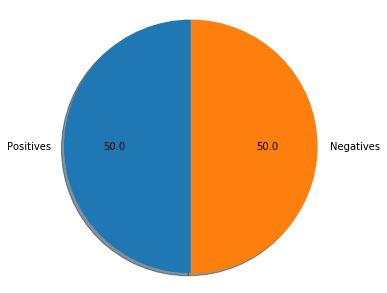

In [8]:
#Draw a pie-chart showing the data distribution
fig = plt.figure(figsize=(5,5))
labels = 'Positives','Negatives'
size = [len(all_positive_tweets),len(all_negative_tweets)]
plt.pie(size,labels=labels,autopct="%1.1f",shadow=True,startangle=90)
plt.axis("equal")
plt.show()

In [9]:
#Printing random tweets
print(all_positive_tweets[random.randint(0,5000)])
print(all_negative_tweets[random.randint(0,5000)])

When the managers at your job tell you and your friend that you are the two prettiest girls there :) :) :) :) :) :) :)
i am not that artistic so how the heck can i do my project :(


In [19]:
def preprocessTweets(tweet_list):
    N = len(tweet_list)
    for i in range(N):
        tweet = tweet_list[i]
        print('\033[92m'+tweet)
        print('\033[94m')
        
        #Remove old style retweet text 'RT'
        tweet2 = re.sub(r'^RT[\s]+','',tweet)
        #Remove hyperlinks
        tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
        # remove hashtags
        # only removing the hash # sign from the word
        tweet2 = re.sub(r'#', '', tweet2)
        
        #print(tweet2)
        #print('\033[92m' + tweet2)
        #print('\033[94m')
        tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
        tweet_tokens = tokenizer.tokenize(tweet2)
        #print()
        #print("Tokenized strings: ")
        #print(tweet_tokens)
        
        #print()
        #print('\033[92m')
        #print(tweet_tokens)
        #print('\033[94m')
        stopwords_english = stopwords.words('english')
        tweets_clean = []
        for words in tweet_tokens:
            if(words not in stopwords_english and words not in string.punctuation):
                tweets_clean.append(words)
        
        #print('removed stop words and punctuation:')
        #print(tweets_clean)
        
        #print()
        #print('\033[92m')
        #print(tweets_clean)
        #print('\033[94m')
        
        stemmer = PorterStemmer()
        tweets_stem = []
        for word in tweets_clean:
            tweets_stem.append(stemmer.stem(word))
        
        #print('stemmed words:')
        #print(tweets_stem)
        cleaned_sentence = ' '.join(tweets_stem)
        print(cleaned_sentence)

In [20]:
tweet_list = ['When the managers at your job tell you and your friend that you are the two prettiest girls there :) :) :) :) :) :) :)','My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i']
preprocessTweets(tweet_list)

When the managers at your job tell you and your friend that you are the two prettiest girls there :) :) :) :) :) :) :)

manag job tell friend two prettiest girl :) :) :) :) :) :) :)
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

beauti sunflow sunni friday morn :) sunflow favourit happi friday …
